<a href="https://colab.research.google.com/github/audrey-siqueira/Desafio_Indicium/blob/main/Desafio_Inidicum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando Bilbiotecas**

Importando bibliotecas necessárias para o projeto

In [693]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


## **Carregando o banco de dados**

Todos os 14 arquivos fornecidos pelo desafio são carregados nesse passo.

In [694]:
# importando os dados
Clientes_Demo= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/customer_customer_demo.csv',sep = ';')

In [695]:
# importando os dados
Clientes_Demografia= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/customer_demographics.csv',sep = ';')

In [696]:
# importando os dados
Regiao= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/region.csv',sep = ';')

In [697]:
# importando os dados
Territorios= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/territories.csv',sep = ';')

In [698]:
# importando os dados
Colaboradores_Territorio= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/employee_territories.csv',sep = ';')


In [699]:
# importando os dados
Estados_Americanos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/us_states.csv',sep = ';')


In [700]:
# importando os dados
Pedidos_Detalhes= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/order_details.csv',sep = ';')


In [701]:
# importando os dados
Produtos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/products.csv',sep = ';')


In [702]:
# importando os dados
Categorias= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/categories.csv',sep = ';')

In [703]:
# importando os dados
Fornecedores= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/suppliers.csv',sep = ';')

In [704]:
# importando os dados
Pedidos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/orders.csv',sep = ';')

In [705]:
# importando os dados
Frete= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/shippers.csv',sep = ';')

In [706]:
# importando os dados
Colaboradores= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/employees.csv',sep = ';')

In [707]:
# importando os dados
Clientes= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Indicium/customers.csv',sep = ';')

## **Agrupando todos arquivos em 1 único Dataset**

Como todos arquivos vieram de diferentes fontes e estão separados, nesse tópico todos arquivos foram agregados e unificados, de maneira a ter uma visão panorâmica dos dados da empresa.

In [708]:
Regiao_Final= pd.merge(Territorios,Regiao,on="region_id")

In [709]:
Produtos_com_Categorias= pd.merge(Categorias,Produtos,on="category_id")

In [710]:
Produtos_com_Categorias_com_Fornecedor= pd.merge(Produtos_com_Categorias,Fornecedores,on="supplier_id")

In [711]:
Ordens_Final=pd.merge(Pedidos_Detalhes,Produtos_com_Categorias_com_Fornecedor,on="product_id")
#Manipulando operações matemáticas para gerarem novas colunas com os totais de Custo e Receita
Ordens_Final['Caixa'] = Ordens_Final['quantity'] * Ordens_Final['unit_price_x']
Ordens_Final['Gasto_Estoque'] = Ordens_Final['unit_price_y'] * Ordens_Final['units_in_stock']
Ordens_Final['Gasto_Pedidos'] = Ordens_Final['unit_price_y'] * Ordens_Final['units_on_order']
Ordens_Final['Gasto_Total_Compras']=Ordens_Final['Gasto_Estoque']+Ordens_Final['Gasto_Pedidos']

In [712]:
Pedidos_com_Frete= pd.merge(Pedidos,Frete,left_on="ship_via",right_on="shipper_id")

In [713]:
Pedidos_com_Frete_com_Colaborador= pd.merge(Pedidos_com_Frete,Colaboradores,on="employee_id")

In [714]:
Clientes_com_Pedidos= pd.merge(Clientes,Pedidos_com_Frete_com_Colaborador,on="customer_id")

In [715]:
Final=pd.merge(Ordens_Final,Clientes_com_Pedidos,on="order_id")
Final.head()

,order_id,product_id,unit_price_x,quantity,discount,category_id,category_name,description,picture,product_name,supplier_id,quantity_per_unit,unit_price_y,units_in_stock,units_on_order,reorder_level,discontinued,company_name,contact_name_x,contact_title_x,address,city,region,postal_code,country,phone,fax_x,homepage,Caixa,Gasto_Estoque,Gasto_Pedidos,Gasto_Total_Compras,customer_id,company_name_x,contact_name_y,contact_title_y,address_x,city_x,region_x,postal_code_x,country_x,phone_x,fax_y,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,shipper_id,company_name_y,phone_y,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address_y,city_y,region_y,postal_code_y,country_y,home_phone,extension,photo,notes,reports_to,photo_path
0,10248,11,14.0,12,0.0,4,Dairy Products,Cheeses,\x,Queso Cabrales,5,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,168.0,462.00,630.0,1092.00,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,3,Federal Shipping,(503) 555-9931,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
1,10248,42,9.8,10,0.0,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",\x,Singaporean Hokkien Fried Mee,20,32 - 1 kg pkgs.,14.00,26,0,0,1,Leka Trading,Chandra Leka,Owner,"471 Serangoon Loop, Suite #402",Singapore,NaN,0512,Singapore,555-8787,NaN,NaN,98.0,364.00,0.0,364.00,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,3,Federal Shipping,(503) 555-9931,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
2,10248,72,34.8,5,0.0,4,Dairy Products,Cheeses,\x,Mozzarella di Giovanni,14,24 - 200 g pkgs.,34.80,14,0,0,0,Formaggi Fortini s.r.l.,Elio Rossi,Sales Representative,"Viale Dante, 75",Ravenna,NaN,48100,Italy,(0544) 60323,(0544) 60603,#FORMAGGI.HTM#,174.0,487.20,0.0,487.20,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,3,Federal Shipping,(503) 555-9931,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
3,10296,11,16.8,12,0.0,4,Dairy Products,Cheeses,\x,Queso Cabrales,5,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN,201.6,462.00,630.0,1092.00,LILAS,LILA-Supermercado,Carlos González,Accounting Manager,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,(9) 331-6954,(9) 331-7256,6,1996-09-03,1996-10-01,1996-09-11,1,0.12,LILA-Supermercado,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,1,Speedy Express,(503) 555-9831,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\nMiner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,\x,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
4,10296,16,13.9,30,0.0,3,Confections,"Desserts, candies,

## **Visualização dos Dados**

### Produtos

No tópico relacionado aos Produtos, fatores como frequência de venda e receita foram explorados, primeiramente para o contexto geral e em seguida para os produtos segmentados por categoria.

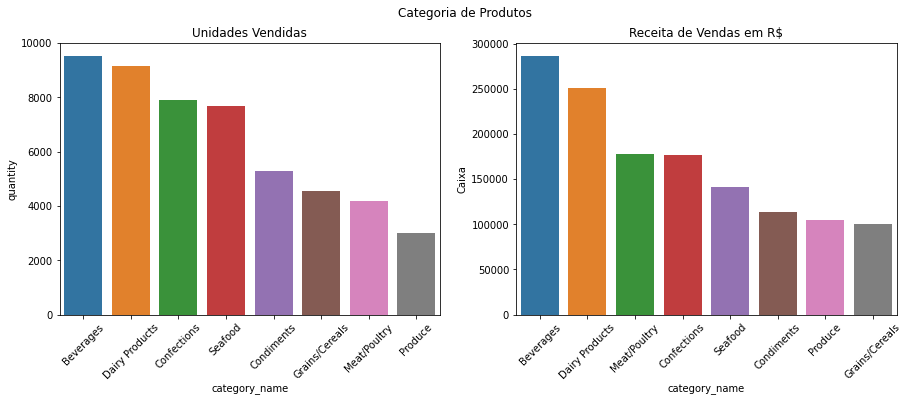

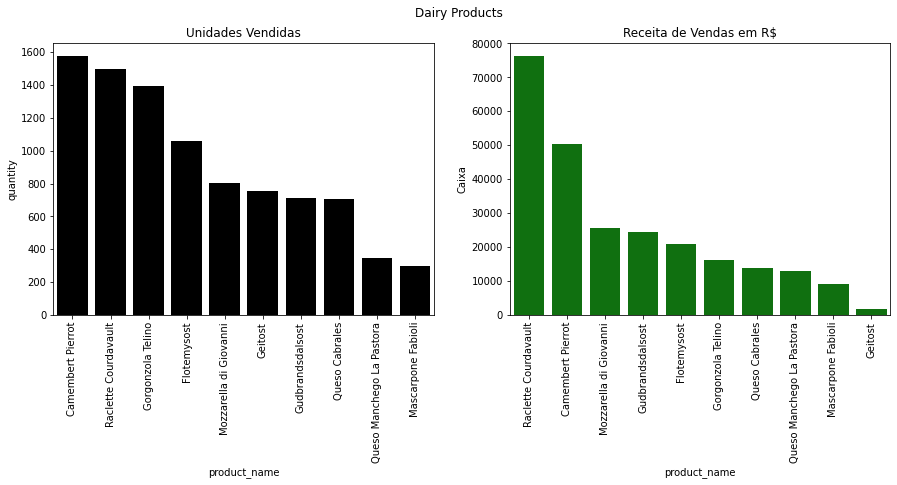

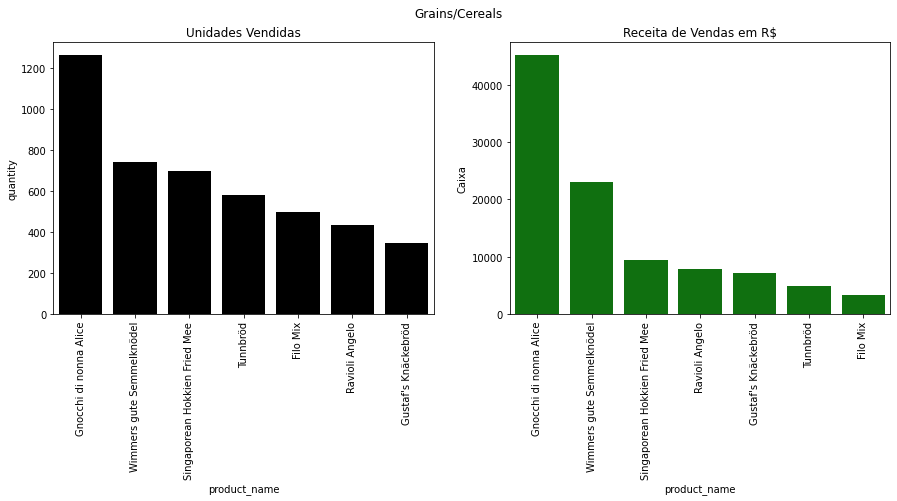

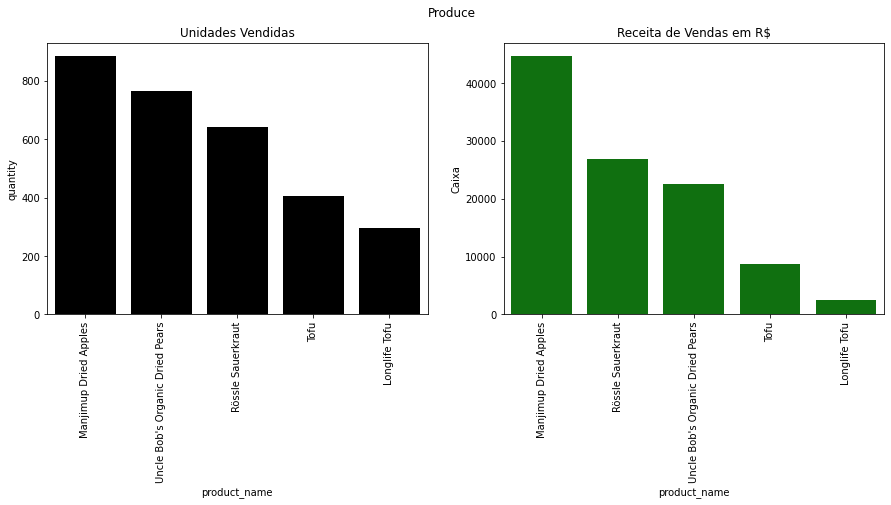

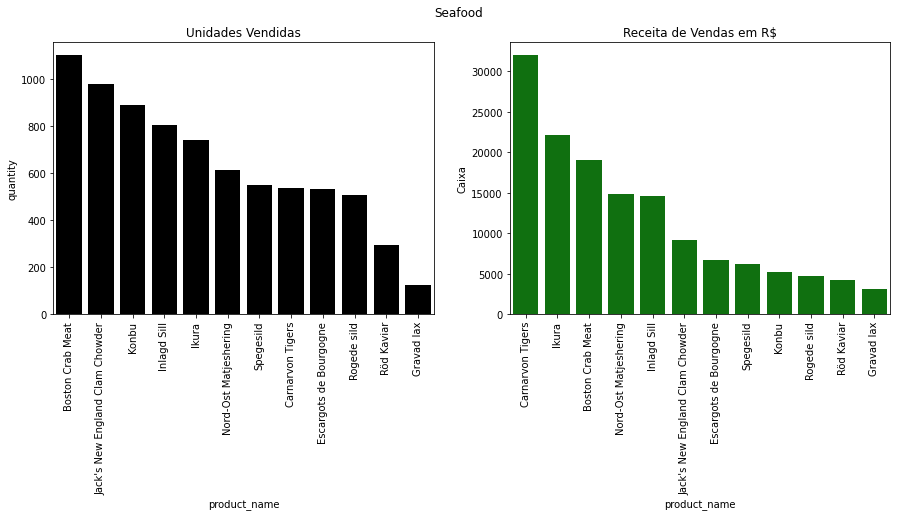

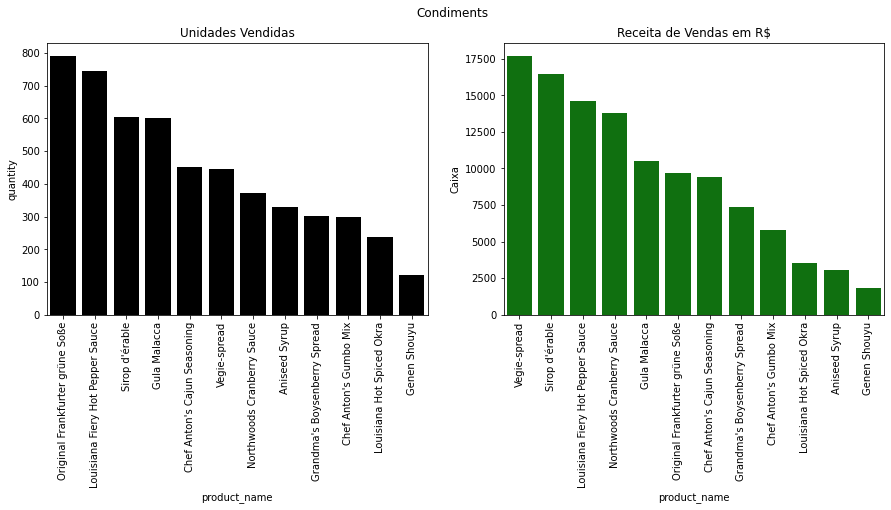

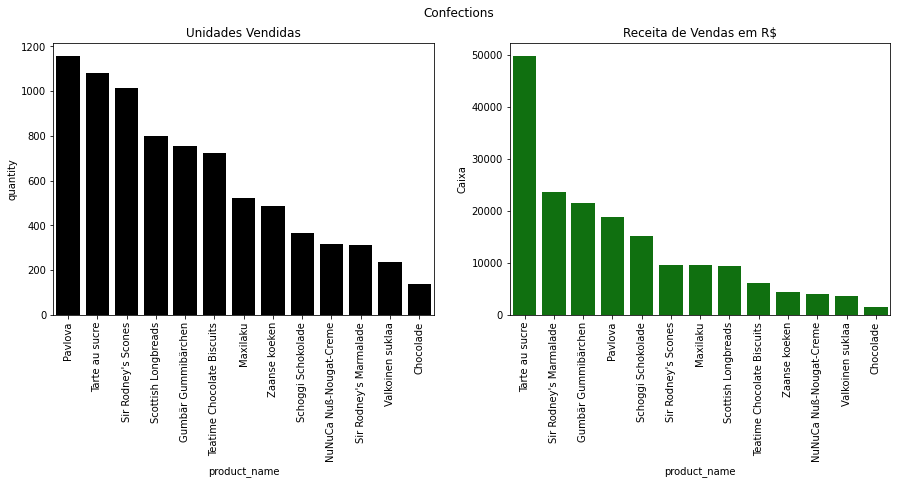

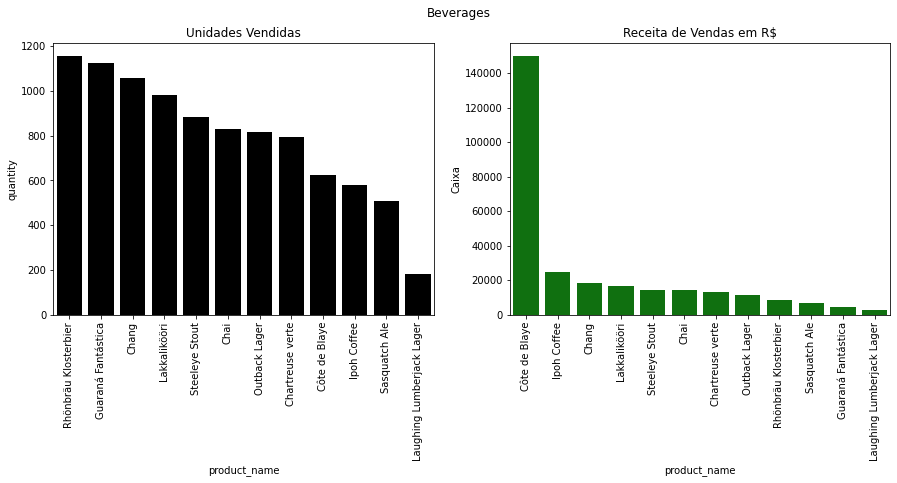

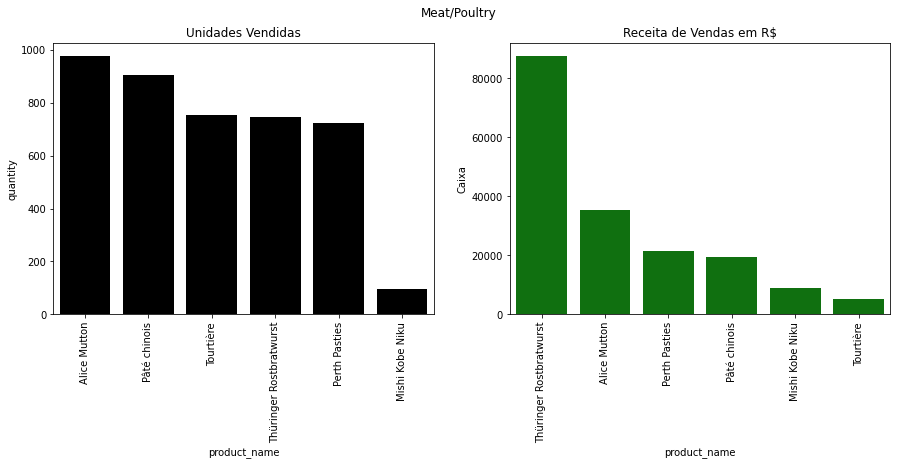

In [716]:
#Histogramas em relação aos Produtos

#POR CATEGORIAS DE PRODUTOS

freq=Ordens_Final.groupby('category_name')['quantity'].sum().sort_values(ascending=False).reset_index()
caixa=Ordens_Final.groupby('category_name')['Caixa'].sum().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Categoria de Produtos')

#UNIDADES VENDIDAS
sns.barplot(ax=axes[0],x='category_name', y='quantity', data=freq)
axes[0].set_title('Unidades Vendidas')
axes[0].tick_params('x',labelrotation=45)

#RECEITA DE VENDA POR PRODUTO
sns.barplot(ax=axes[1],x='category_name', y='Caixa', data=caixa)
axes[1].set_title('Receita de Vendas em R$')
axes[1].tick_params('x',labelrotation=45)


#POR CADA PRODUTO ESPECÍFICO

for i in Ordens_Final['category_name'].unique():

 freqX=Ordens_Final[Ordens_Final['category_name']==i].groupby('product_name')['quantity'].sum().sort_values(ascending=False).reset_index()
 caixaX=Ordens_Final[Ordens_Final['category_name']==i].groupby('product_name')['Caixa'].sum().sort_values(ascending=False).reset_index()

 fig, axes = plt.subplots(1, 2, figsize=(15, 5))
 fig.suptitle(i)
 
 #UNIDADES VENDIDAS
 sns.barplot(ax=axes[0],x='product_name', y='quantity', data=freqX,color='black')
 axes[0].set_title('Unidades Vendidas')
 axes[0].tick_params('x',labelrotation=90)

 #RECEITA DE VENDA POR PRODUTO
 sns.barplot(ax=axes[1],x='product_name', y='Caixa', data=caixaX,color='green')
 axes[1].set_title('Receita de Vendas em R$')
 axes[1].tick_params('x',labelrotation=90)


### Clientes

Para a análise dos clientes, fatores como gastos em R$ e número de pedidos por cada foram demonstrados abaixo:

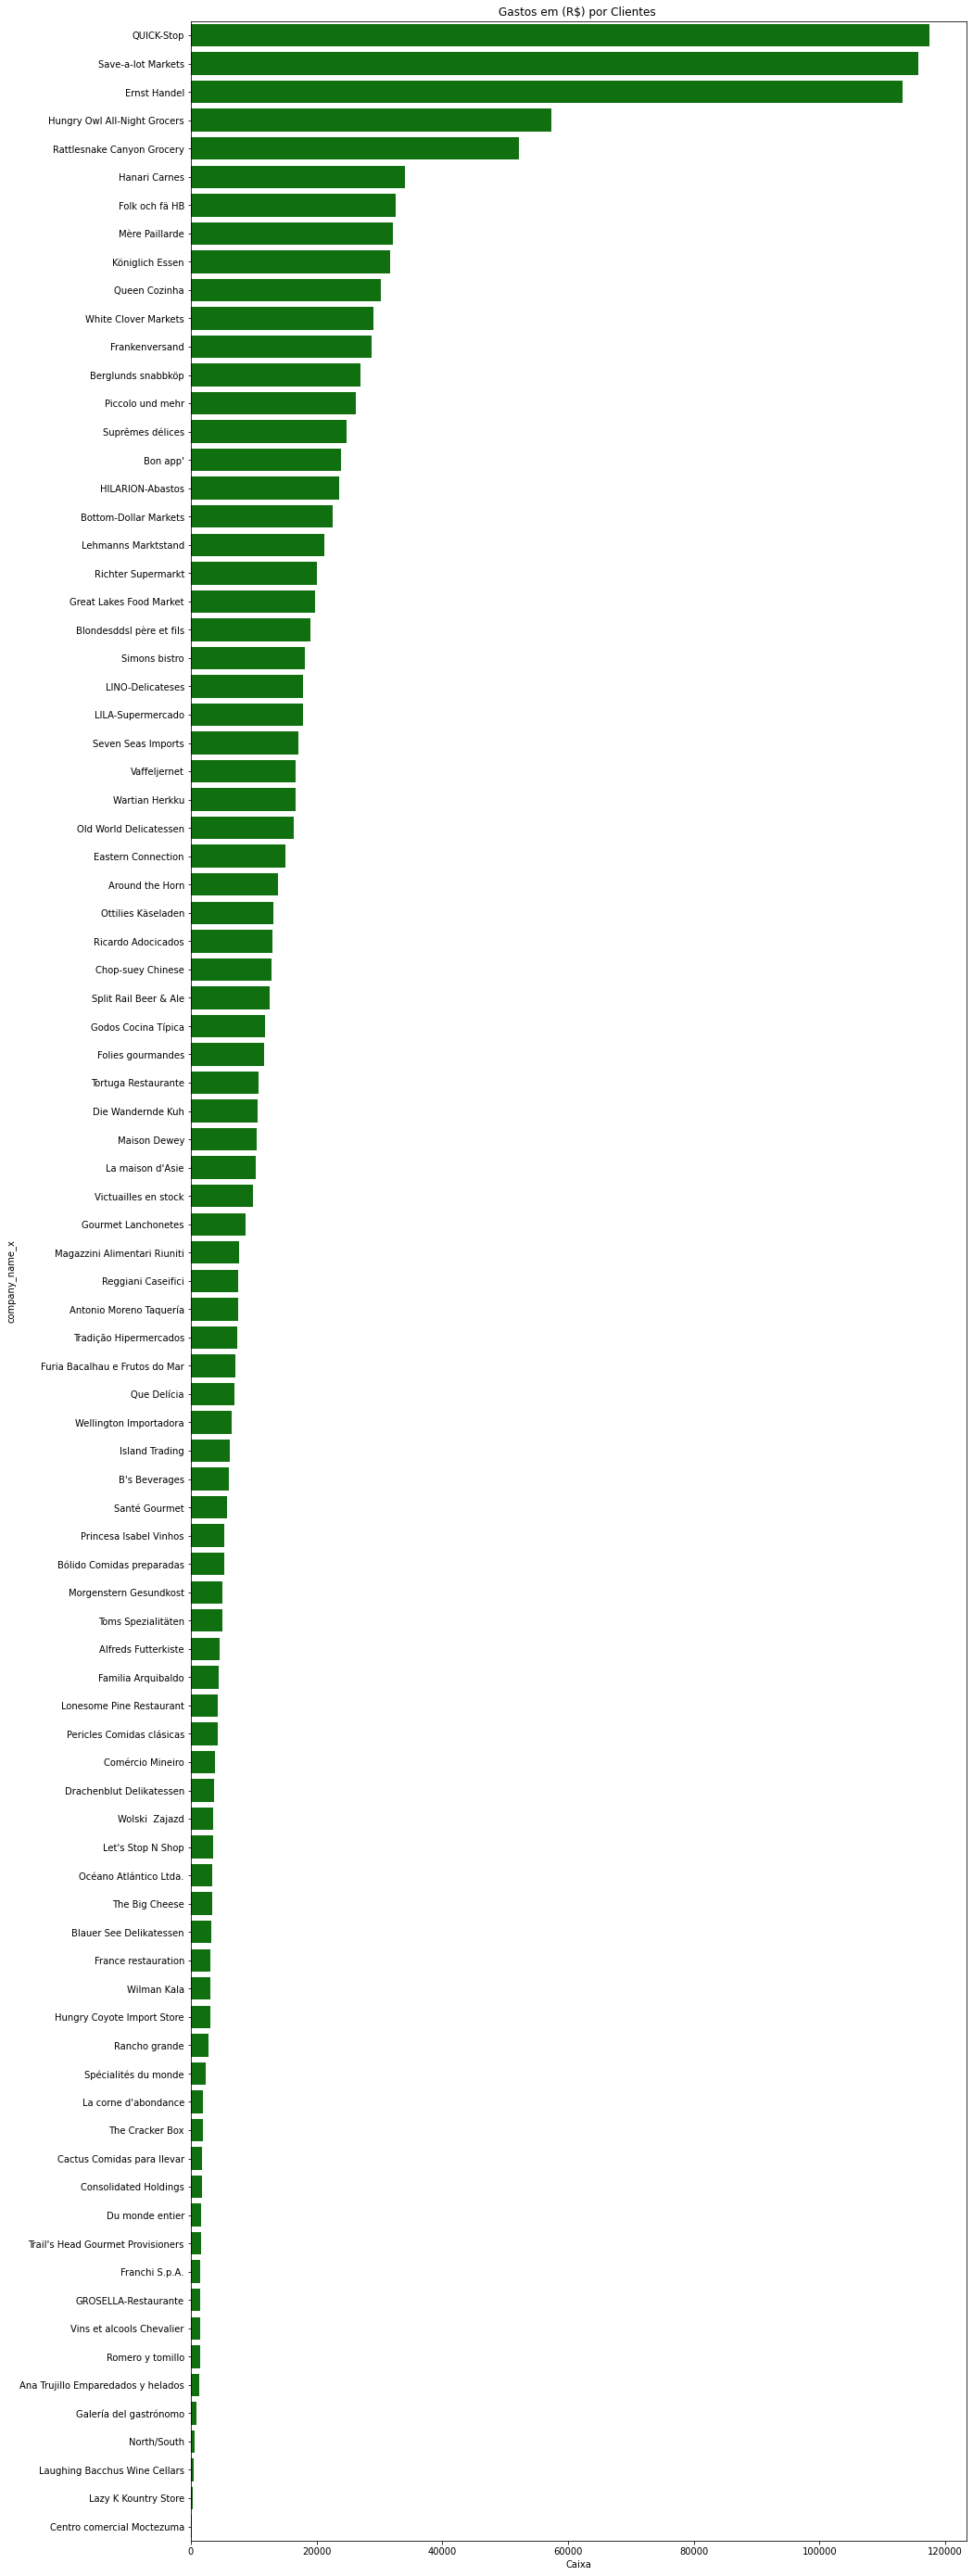

In [717]:
# Histogramas em relação ao Cliente

#GASTOS EM R$ POR CADA CLIENTE
caixa_clientes=Final.groupby('company_name_x')['Caixa'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,50))
plt.title('Gastos em (R$) por Clientes ')
sns.barplot(y='company_name_x', x='Caixa', data=caixa_clientes ,color='green')

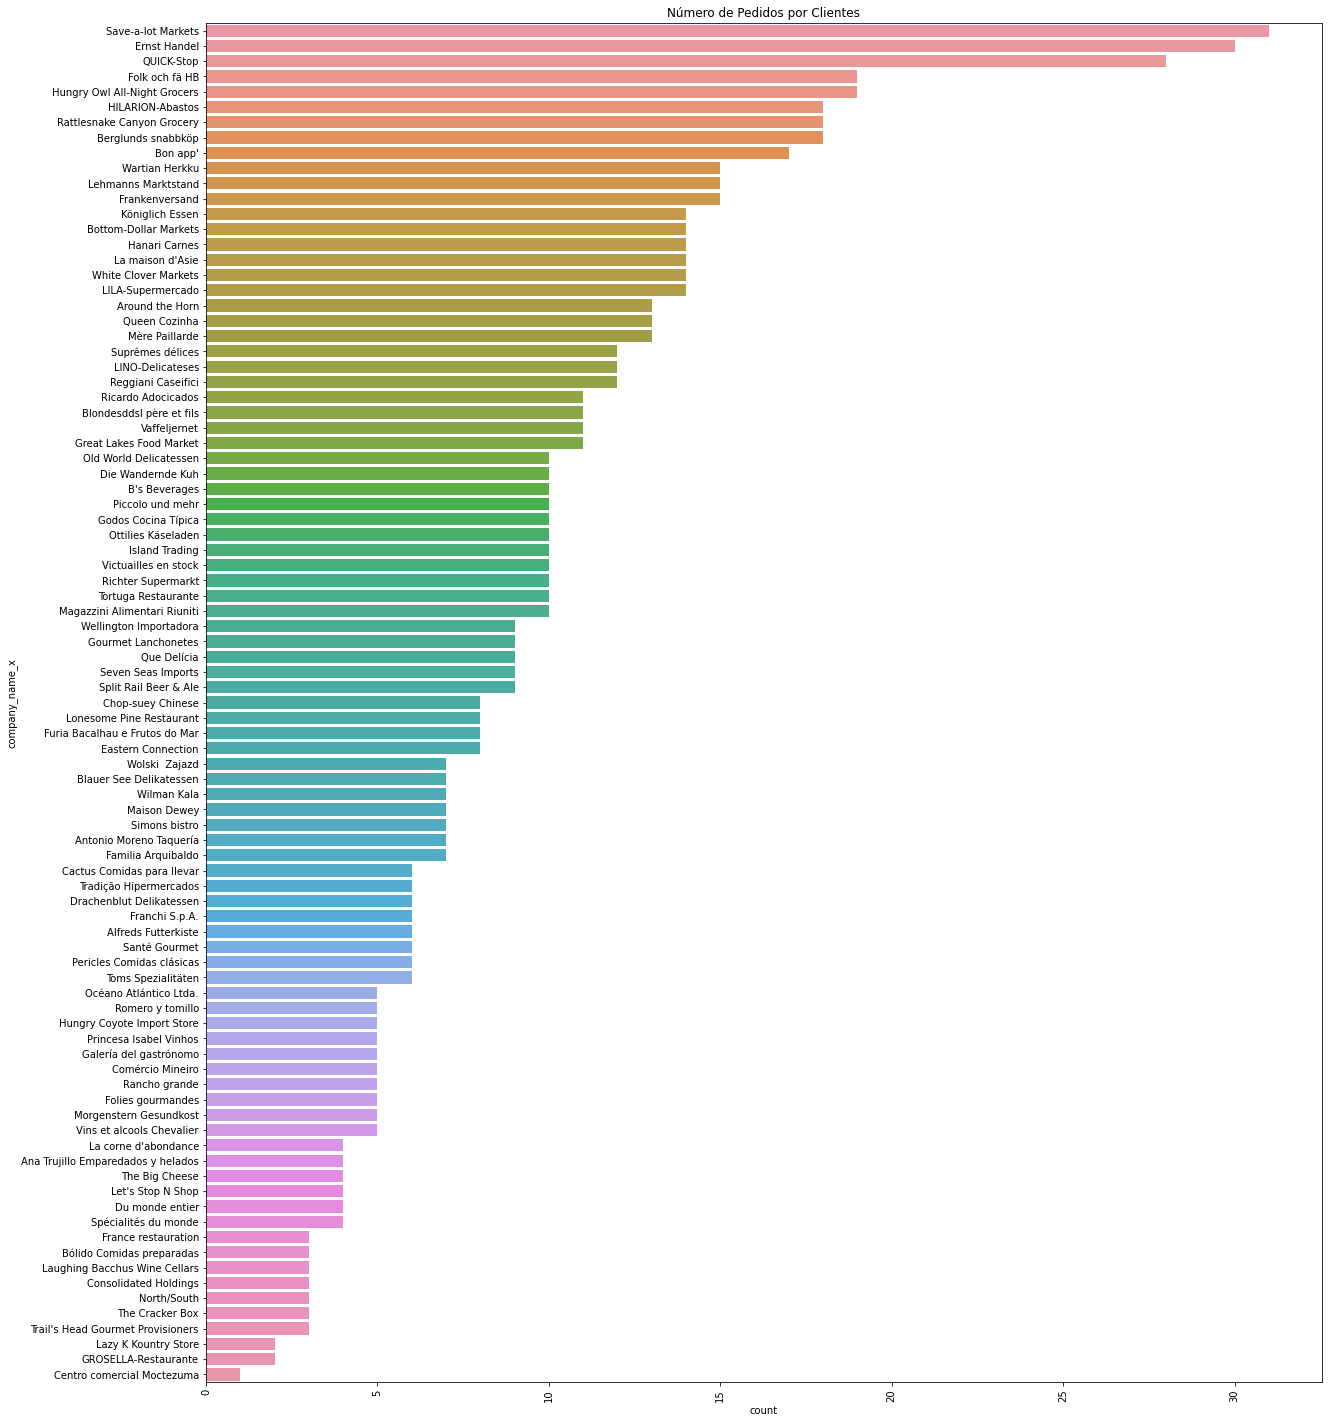

In [718]:
#NÚMERO DE PEDIDOS POR CLIENTE
plt.figure(figsize=(20,25))
plt.title('Número de Pedidos por Clientes')
plt.xticks(rotation=90)
sns.countplot(y='company_name_x',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['company_name_x'].value_counts().index)

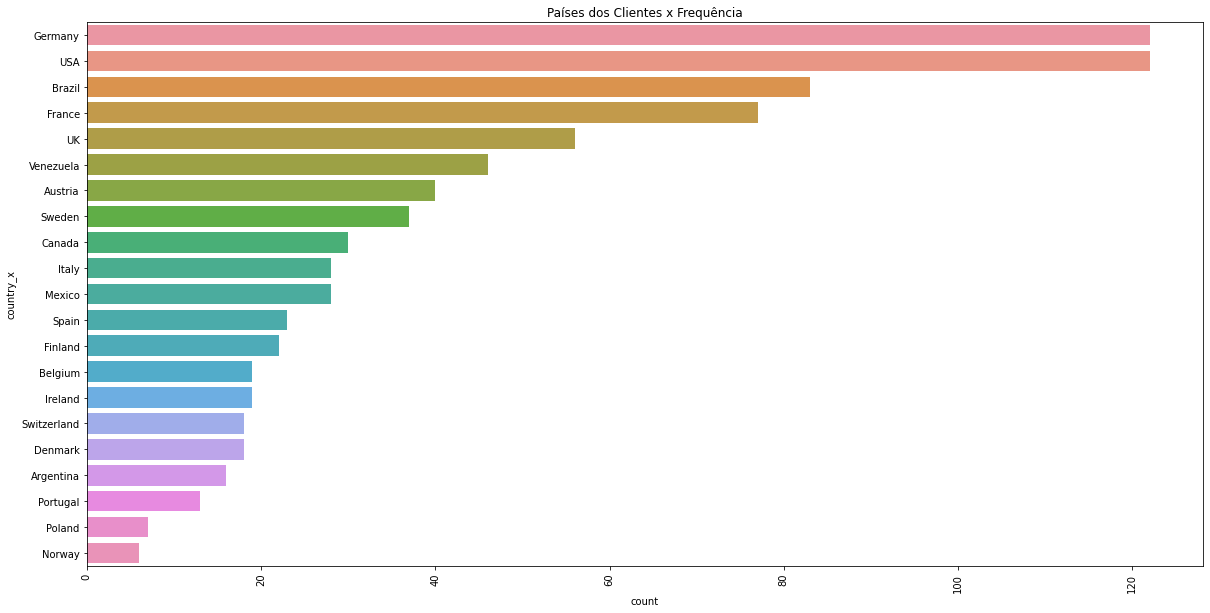

In [719]:
#Ranking de Clientes por Países
plt.figure(figsize=(20,10))
plt.title('Países dos Clientes x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='country_x',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['country_x'].value_counts().index)

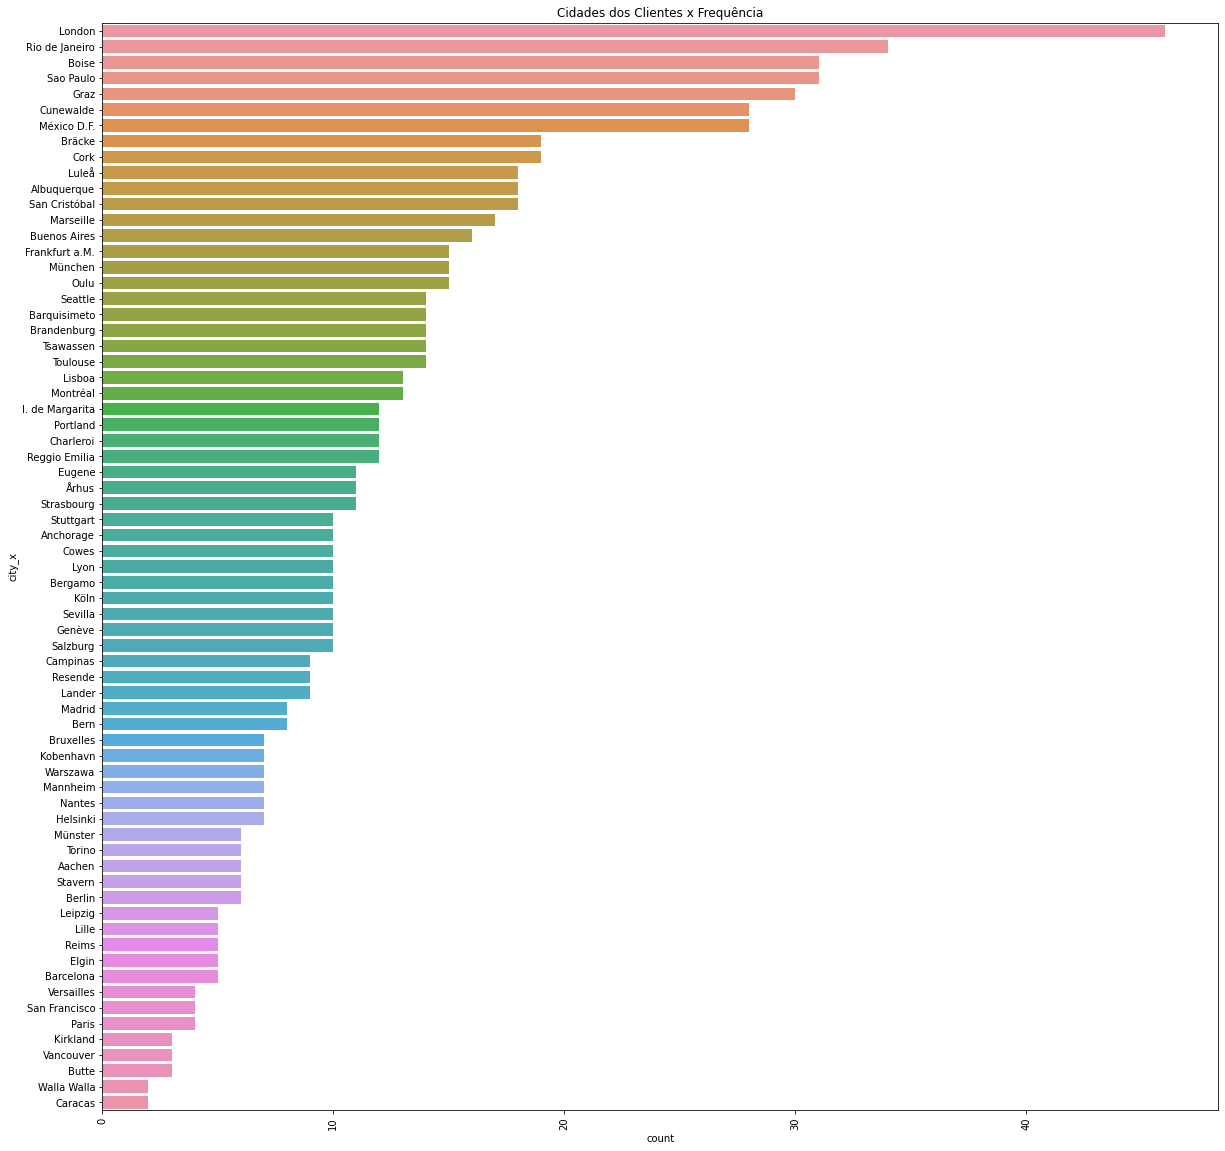

In [720]:
#Ranking de Clientes por Cidades
plt.figure(figsize=(20,20))
plt.title('Cidades dos Clientes x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='city_x',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['city_x'].value_counts().index)

### Colaboradores

Para uma empresa saber sua eficiência, o número de atividades completadas por um colaborador, assim como o total de receita que esse colaborador gera com suas atividades, é de vital importância.

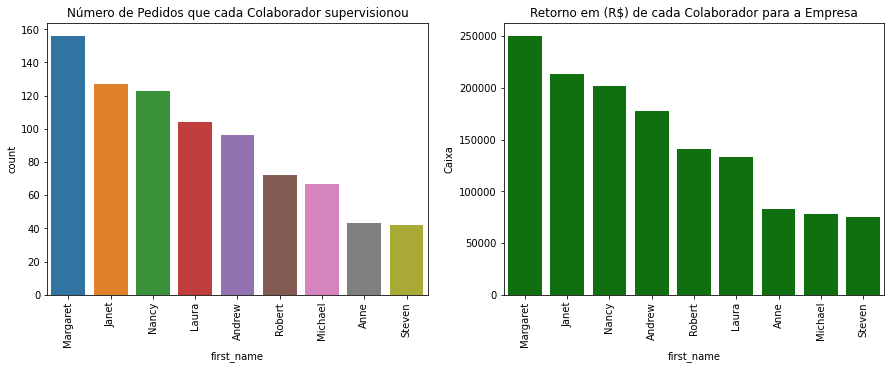

In [721]:
#Histogramas em relação aos Colaboradores

Eficiencia_Colaborador=Final.groupby('first_name')['Caixa'].sum().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Número de Pedidos que cada Colaborador supervisionou
sns.countplot(ax=axes[0],x='first_name',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['first_name'].value_counts().index)
axes[0].set_title('Número de Pedidos que cada Colaborador supervisionou')
axes[0].tick_params('x',labelrotation=90)

#Retorno em (R$) de cada Colaborador para a Empresa
sns.barplot(ax=axes[1],x='first_name', y='Caixa', data=Eficiencia_Colaborador ,color='green')
axes[1].set_title('Retorno em (R$) de cada Colaborador para a Empresa')
axes[1].tick_params('x',labelrotation=90)

### Fornecedores

Em relação aos fornecedores, os gastos com cada um deles além desses mesmos gastos segmentados por categoria, auxilia a empresa projetar seus custos.

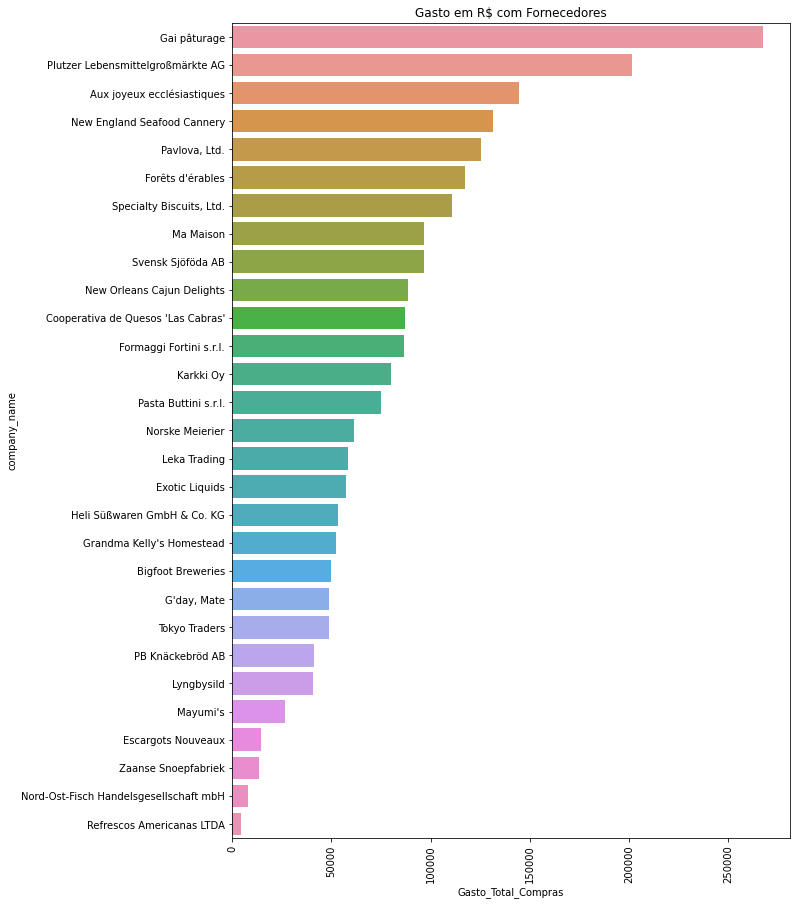

In [722]:
#Histogramas em relação aos Fornecedores
caixa2=Ordens_Final.groupby('company_name')['Gasto_Total_Compras'].sum().sort_values(ascending=False).reset_index()

#Ranking de Gastos em R$ com cada Fornecedor
plt.figure(figsize=(10,15))
plt.title('Gasto em R$ com Fornecedores')
plt.xticks(rotation=90)
sns.barplot(y='company_name', x='Gasto_Total_Compras', data=caixa2)
 

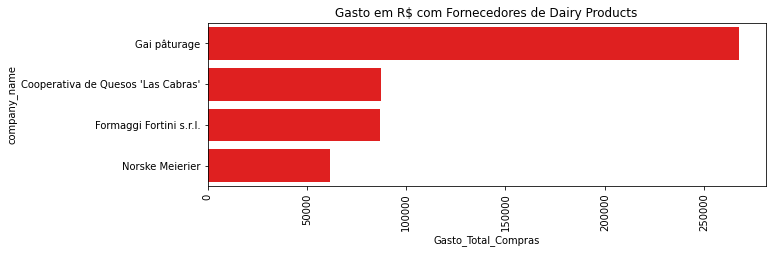

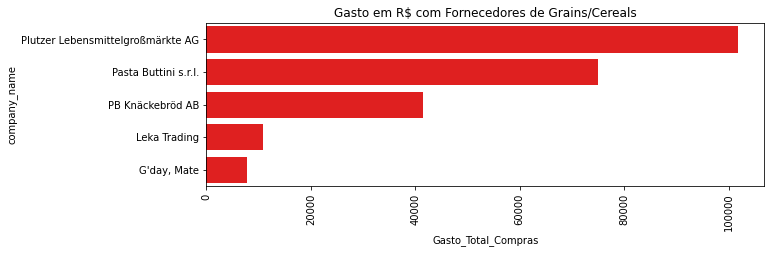

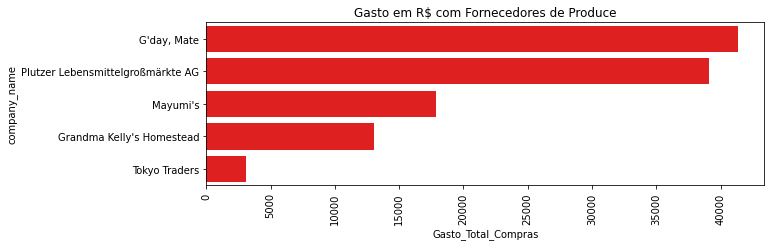

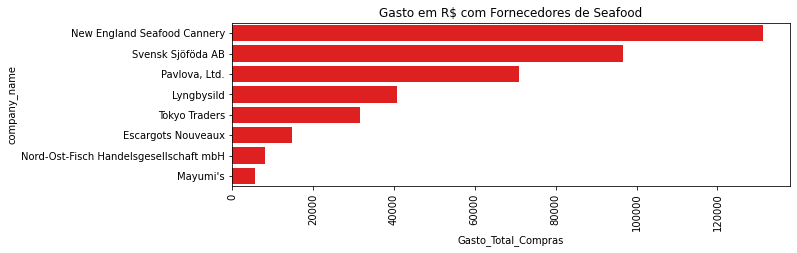

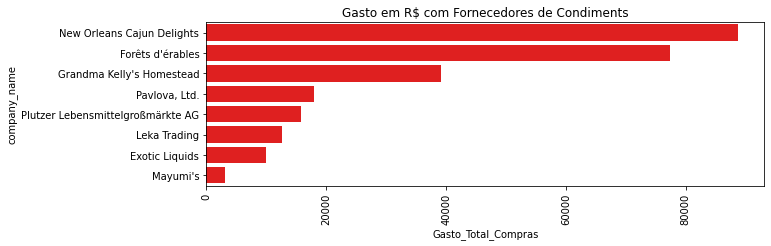

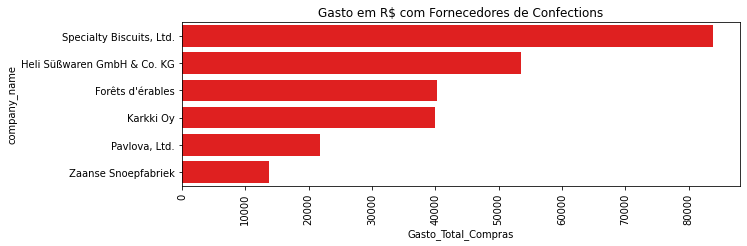

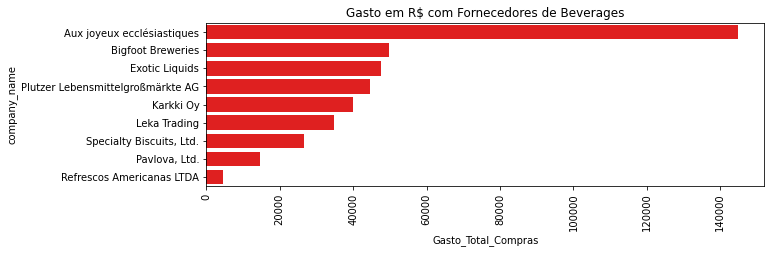

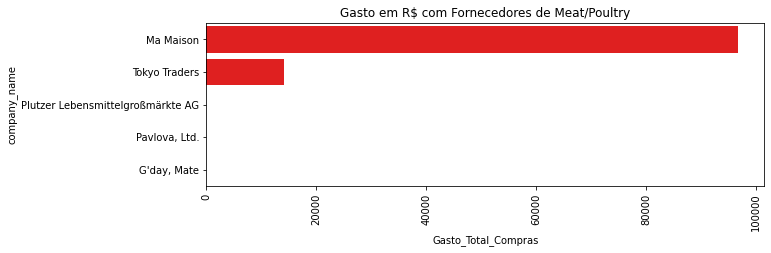

In [723]:
#Ranking de Gastos em R$ com cada Fornecedor segmentado por Categoria de Produtos
for i in Ordens_Final['category_name'].unique():

 caixaY=Ordens_Final[Ordens_Final['category_name']==i].groupby('company_name')['Gasto_Total_Compras'].sum().sort_values(ascending=False).reset_index()

 plt.figure(figsize=(10,3))
 plt.title('Gasto em R$ com Fornecedores de '+i)
 plt.xticks(rotation=90)
 
 sns.barplot(y='company_name', x='Gasto_Total_Compras', data=caixaY,color='red')
 

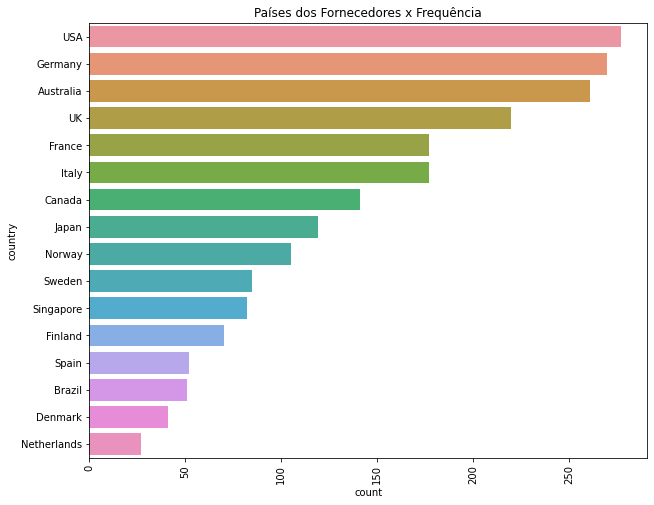

In [724]:
#Ranking dos Países em que a empresa possui mais fornecedores
plt.figure(figsize=(10,8))
plt.title('Países dos Fornecedores x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='country',data=Ordens_Final,order =Ordens_Final['country'].value_counts().index)

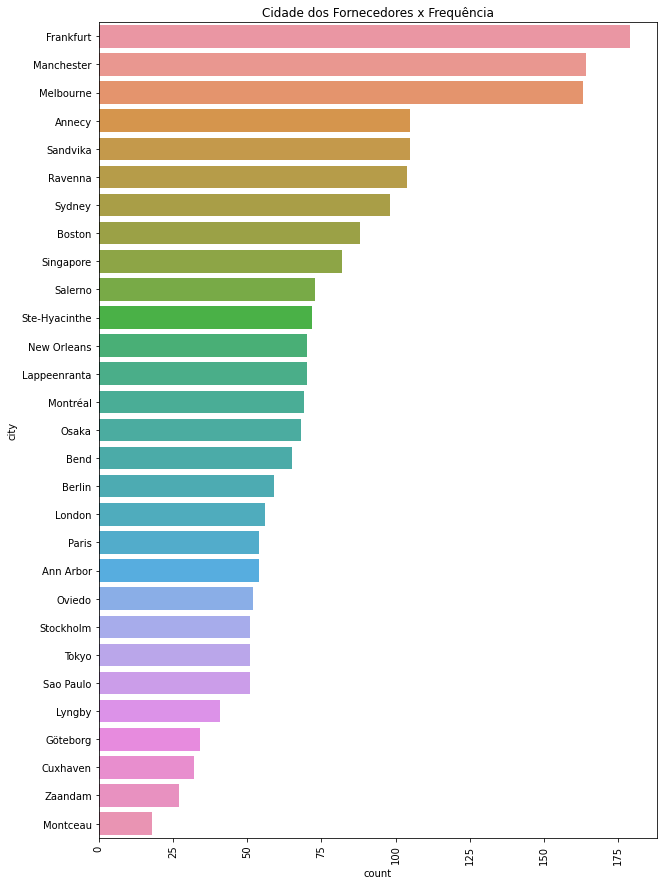

In [725]:
#Ranking das Cidades em que a empresa possui mais fornecedores
plt.figure(figsize=(10,15))
plt.title('Cidade dos Fornecedores x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='city',data=Ordens_Final,order =Ordens_Final['city'].value_counts().index)

### Frete

Os custos com Frete e o número de vezes que a empresa utilizou cada fretadora podem ser visualizados.

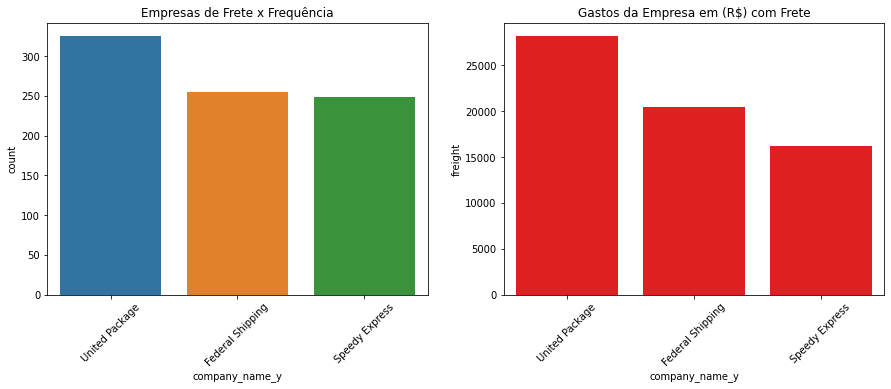

In [726]:
#Histogramas em relação ao Frete
Gastos_Frete=Clientes_com_Pedidos.groupby('company_name_y')['freight'].sum().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Empresas de Frete x Frequência
sns.countplot(ax=axes[0],x='company_name_y',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['company_name_y'].value_counts().index)
axes[0].set_title('Empresas de Frete x Frequência')
axes[0].tick_params('x',labelrotation=45)

#Gastos da Empresa em (R$) com Frete
sns.barplot(ax=axes[1],x='company_name_y', y='freight', data=Gastos_Frete ,color='red')
axes[1].set_title('Gastos da Empresa em (R$) com Frete')
axes[1].tick_params('x',labelrotation=45)

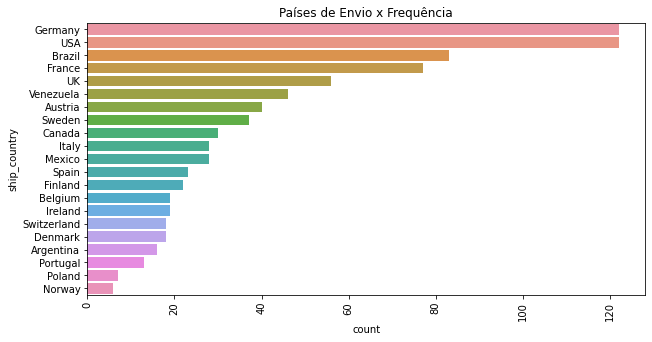

In [727]:
#Rankings dos Países que a empresa vendeu mais Produtos
plt.figure(figsize=(10,5))
plt.title('Países de Envio x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='ship_country',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['ship_country'].value_counts().index)

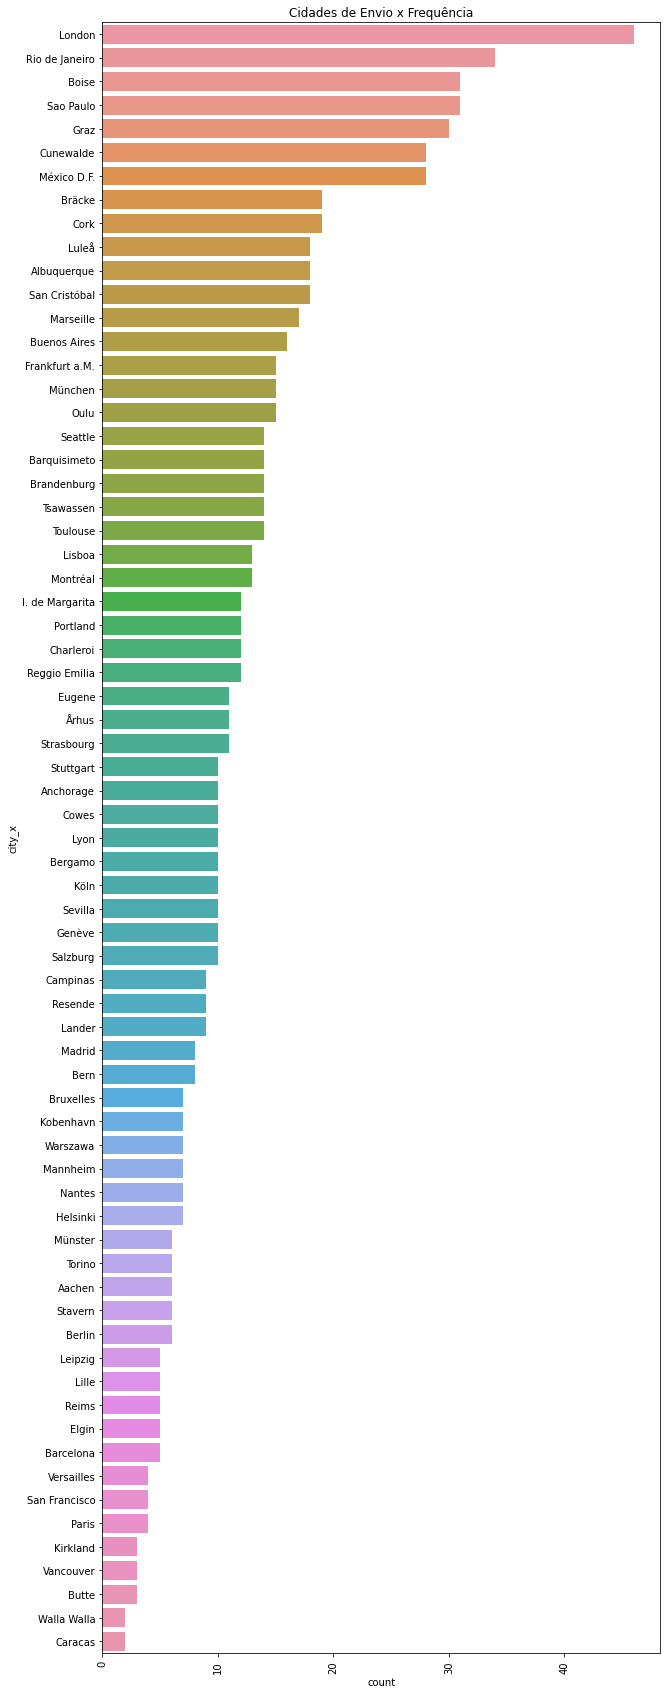

In [728]:
#Rankings das Cidades que a empresa vendeu mais Produtos
plt.figure(figsize=(10,30))
plt.title('Cidades de Envio x Frequência')
plt.xticks(rotation=90)
sns.countplot(y='city_x',data=Clientes_com_Pedidos, order =Clientes_com_Pedidos['city_x'].value_counts().index)

### Panorama Geral dos Números da Empresa

Nesse tópico os números de vendas, valor de estoque, gastos para novos produtos de estoque e gastos de frete são exibidos:

In [729]:
#Números finais de Vendas
receita=sum(Ordens_Final['Caixa'])
unidades_vendidas=sum(Ordens_Final['quantity'])
print('A RECEITA TOTAL DA EMPRESA FOI DE: R$',round(receita,2))
print('O TOTAL DE UNIDADES VENDIDAS FOI DE:',unidades_vendidas)

A RECEITA TOTAL DA EMPRESA FOI DE: R$ 1354458.59
O TOTAL DE UNIDADES VENDIDAS FOI DE: 51317


In [730]:
#Números finais de Estoque
estoque=sum(Ordens_Final['Gasto_Estoque'])
unidades_estoque=sum(Ordens_Final['units_in_stock'])
print('O VALOR GASTO DE ESTOQUE FOI DE: R$',round(estoque,2))
print('O TOTAL DE UNIDADES EM ESTOQUE É DE:',unidades_estoque)


O VALOR GASTO DE ESTOQUE FOI DE: R$ 1959476.0
O TOTAL DE UNIDADES EM ESTOQUE É DE: 85760


In [731]:
#Números finais de Compras de Fornecedores
compras=sum(Ordens_Final['Gasto_Pedidos'])
unidades_compras=sum(Ordens_Final['units_on_order'])
print('O GASTO PARA ADQUIRIR NOVOS PRODUTOS DE ESTOQUE: R$',round(compra,2))
print('O TOTAL DE UNIDADES ADQUIRIDAS PELO DEPARTAMENTO DE COMPRAS É DE:',unidades_compras)

O GASTO PARA ADQUIRIR NOVOS PRODUTOS DE ESTOQUE: R$ 330850.0
O TOTAL DE UNIDADES ADQUIRIDAS PELO DEPARTAMENTO DE COMPRAS É DE: 17400


In [732]:
#Números finais de gastos com frete
gastos_frete=sum(Clientes_com_Pedidos['freight'])
print('O GASTO TOTAL DE FRETE PARA COMPLETAR OS PEDIDOS É: R$',round(gastos_frete,2))


O GASTO TOTAL DE FRETE PARA COMPLETAR OS PEDIDOS É: R$ 64942.69


# **Conclusão**

Através da interpretação dos dados da empresa, é possível concluir que:

- As categorias de produtos Beverages e Dairy Products sáo os produtos que geram melhor receita para a empresa, porém as demais categorias não são muito menores, permitindo a empresa ter um equilíbrio em seu catalogo de categoria de produtos. Dentro do segmento de Beverages, é observado que o produto que gera mais receita é o Cote de Blaye, mesmo não sendo o produto mais vendido em quantidade. Nos Dairy Products, o produto que gera mais caixa é o Raclette. A empresa possui um bom balanço quanto a seus produtos e nenhuma lacuna se mostrou presente.

- Os melhores clientes são as empresas QUICK-stop, Save-a-lot-Markets e Ernst Handel, cada uma gerando quase R$ 120000 de retorno a empresa. Também foi obsevardo que a maioria dos clientes se encontra nos EUA ou Alemanha, porém algumas cidades pontuais fora desses países também apresentam grande demanada, como Londres, Rio de Janeiro e São Paulo.

- Dentre os colaboradores, Margaret, Janet e Nancy apresentam desempenho acima da média, pelo menos em questão de volume de trabalho e receita retornada a empresa.

- Os fornecedores que apresentam maior requisição da empresa são : Gai Paturage e Plutzer Lebensmittel. A empresa deve buscar uma variação maior de fornecedores, porque em segmentos como Beverages, Dairy Products e Meat/Poultry, a empresa se encontra um pouco dependente de 1 fornecedor, o que poderia causar problemas futuros e impactar as vendas dos principais produtos da empresa. Assim como os clientes, a maioria dos fornecedores também estão localizados nos EUA e Alemanha, com muitos fornecedores em Frankfurt e Manchester.

- Como consequência dos clientes e fornecedores, as principais regiões de envio do frete também são EUA e Alemanha, com uma excessão para a cidade de Londres. Basicamente 3 empresas fretadoras fazem todos os fretes, possuindo um bom equilíbrio entra elas.

- Verificando os números finais da empresa, ela possuí um estoque de praticamente 1.5 vezes seu volume de vendas, considerado uma boa prática.Além disso seu gasto com compras e frete chega a 30% da sua receita de vendas, com esses números a empresa parece estar saudável financeiramente e bem posicionada no mercado.